# ENAP - Especialização em Ciências de Dados aplicadas a Políticas Públicas - ECaP.
### Disciplina: D6 - Estatística Descritiva
### Professor: Eduardo Gomes
### Aluno: Tulio Conrado Campos da Silva
## Trabalho Final

## Introdução

Os dados em foco para o trabalho proposto são de planejamento e execução orçamentárias, advindos do SIAFI, para o Programa Temático do PPA 2016-2019 referente ao Programa Espacial Brasileiro. Ele concentra todos o orçamento planejado e o efetivamente executado para os principais projetos referentes a satélites, veículos lançadores e manutenção da infraestrutura espacial em solo (centros de lançamento, laboratórios, centros de operação, etc), bem como investimentos em capacitação, contratos com transferência de tecnologia e P&D.

Que conclusões podemos tirar a partir da análise descritiva dos dados do último PPA do Programa Espacial? Essas informações poderão ajudar na execução do próximo ciclo. Alguns projetos, que continuam no atual ciclo do PPA (2020-2023), poderão se beneficiar com informações extraídas dessa análise. Mais especificamente, para esse trabalho, trabalharemos o orçamento planejado e o orçamento efetivamente pago, comparando, de forma simplificada, quanto do Programa Espacial Brasileiro planejado foi executado nesse período.

## Extração e limpeza dos dados

Os dados são referentes aos valores, em reais, relativos a ações orçamentárias do programa temático do Programa Espacial Brasileiro, no Plano Plurianual de 2016 a 2019. Esses valores planejados e executados são qualificados por diversas variáveis, como tempo, natureza da despesa realizada, detalhes do fornecedor que recebeu o recurso e que tipo de serviço foi realizado, quando o dado estiver disponível.

Os dados foram coletados do sistema SIGA Brasil, módulo Especialista, por meio de consulta construída no sistema Micro Strategy. Os dados foram pré-tratados na consulta construída, com inserção de zeros no lugar de valores vazios.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# dados de orçamento do PPA 2016-2019 para o Programa Espacial Brasileiro.
dados = pd.read_csv("https://raw.githubusercontent.com/zabife/enap_ecap_d6/main/data.csv",
sep = ";",
decimal = ",",
low_memory = False,
encoding = "iso8859_16")

## Descrição abreviada dos dados

Os dados são compostos de 21 variáveis quantitativas e 31 qualitativas.

Para esse trabalho, consideraremos as variáveis quantitativas de "Projeto de Lei", ou seja, os valores planejados para as ações do Programa Espacial, e "Pago", ou seja, os valores efetivamente executados.

In [169]:
print(dados.head())
print("Média do orçamento planejado:", dados["PL"].mean())
print("Média dos gastos executados:", dados["Pago"].mean())

  Mês/Ano (12/2009)   Ano Localidade.Regiăo  Localidade.UF  \
0           02/2016  2016          NACIONAL  NĂO APLICÁVEL   
1           12/2016  2016          NACIONAL  NĂO APLICÁVEL   
2           08/2016  2016          NACIONAL  NĂO APLICÁVEL   
3           05/2016  2016          NACIONAL  NĂO APLICÁVEL   
4           01/2016  2016          NACIONAL  NĂO APLICÁVEL   

  Localidade.Localidade Localidade (Tipo)  \
0              NACIONAL          NACIONAL   
1              NACIONAL          NACIONAL   
2              NACIONAL          NACIONAL   
3              NACIONAL          NACIONAL   
4              NACIONAL          NACIONAL   

                                    Órgăo (Cod/Desc)  \
0  24000 - MINISTÉRIO DA CIÊNCIA, TECNOLOGIA E IN...   
1  24000 - MINISTÉRIO DA CIÊNCIA, TECNOLOGIA E IN...   
2  24000 - MINISTÉRIO DA CIÊNCIA, TECNOLOGIA E IN...   
3  24000 - MINISTÉRIO DA CIÊNCIA, TECNOLOGIA E IN...   
4  24000 - MINISTÉRIO DA CIÊNCIA, TECNOLOGIA E IN...   

                   

### Planejamento e execução do orçamento por ano (LOA)

A execução do orçamento planejado têm sido aquém do esperado (100%). Esse valor acentuou-se em 2017, e, desde então, o orçamento disponível em tempo de planejamento é cada vez menor.

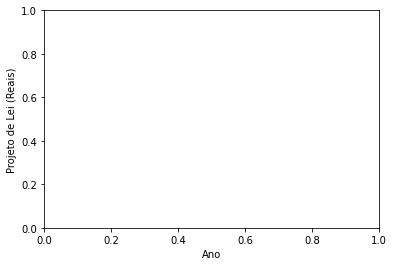

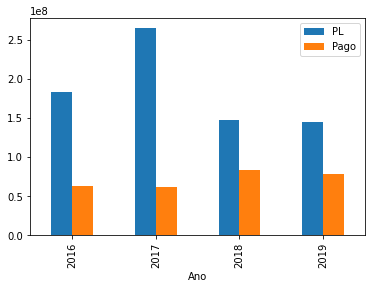

In [146]:
fig , ax = plt.subplots()
dados.groupby("Ano")[["PL", "Pago"]].sum().plot.bar()
ax.set_ylabel("Projeto de Lei (Reais)")
ax.set_xlabel("Ano")
plt.show()

### Planejamento do orçamento por Natureza da Despesa

O planejamento mostra a distribuição de recursos orçamentários em rubricas de Investimento (compra de equipamentos, materiais, por exemplo), e de Custeio (manutenção, serviços, contratos de suporte de infraestrutura). São próximos para os dois exemplos escolhidos, projetos de desenvolvimento de satélites (Ação Orçamentária 20VC) e de desenvolvimento de lançadores (Ação Orçamentária 20VB).

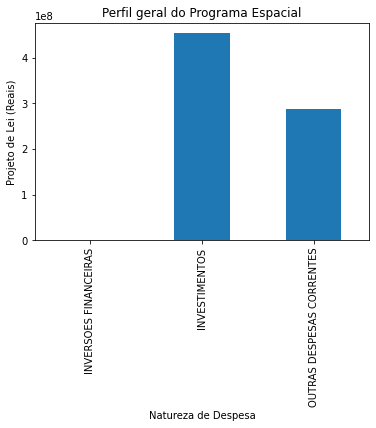

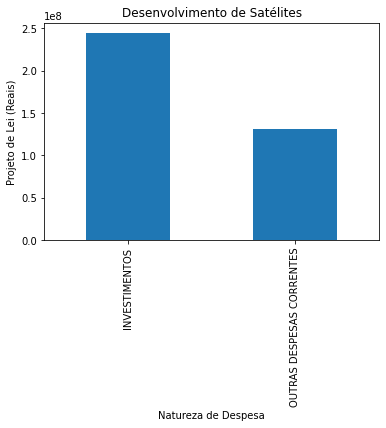

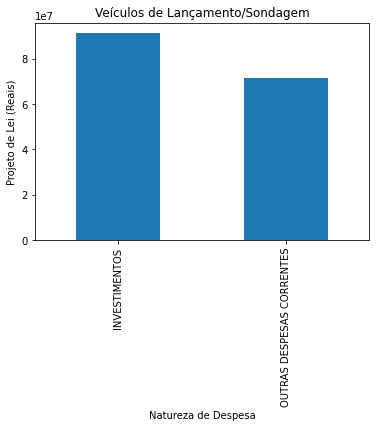

In [147]:
fig , ax = plt.subplots()
dados.groupby("GND")["PL"].sum().plot.bar()
ax.set_ylabel("Projeto de Lei (Reais)")
ax.set_xlabel("Natureza de Despesa")
ax.set_title("Perfil geral do Programa Espacial")
plt.show()

# Para projetos de desenvolvimento de satélites

dados_20VC = dados[(dados["Açăo (Cod/Desc)"] == '20VC - DESENVOLVIMENTO, LANCAMENTO E OPERACAO DE SATELITES, COM A I')]
fig , ax = plt.subplots()
dados_20VC.groupby("GND")["PL"].sum().plot.bar()
ax.set_ylabel("Projeto de Lei (Reais)")
ax.set_xlabel("Natureza de Despesa")
ax.set_title("Desenvolvimento de Satélites")
plt.show()

# Para projetos de desenvolvimento de veículos de lançamento / sondagem

dados_20V0 = dados[(dados["Açăo (Cod/Desc)"] == '20V0 - DESENVOLVIMENTO E LANCAMENTO DE FOGUETES SUBORBITAIS E DE VE')]
fig , ax = plt.subplots()
dados_20V0.groupby("GND")["PL"].sum().plot.bar()
ax.set_ylabel("Projeto de Lei (Reais)")
ax.set_xlabel("Natureza de Despesa")
ax.set_title("Veículos de Lançamento/Sondagem")
plt.show()

## Execução do Programa Espacial

Os principais fornecedores que receberam recursos do Programa Espacial denotam os destinos dos valores pagos, e reforçam características de dependência tecnológica do setor espacial brasileiro.

A presença da empresa "Spaceflight Inc.", estrangeira, sediada na Índia, é devida à contratação do serviço de lançamento orbital do satélite Amazonia-1, lançado em fevereiro de 2020 com recursos alocados em 2019 (portanto, no PPA 2016-2019). Essa dependência reforça a necessidade de se desenvolver tecnologias nacionais de lançamento de objetos espaciais.

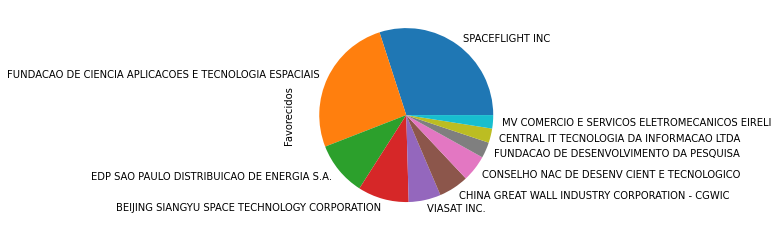

In [148]:
fig , ax = plt.subplots()
dados.groupby("Favorecido")["Pago"].sum().sort_values(ascending=False).head(10).plot.pie()
ax.set_ylabel("Favorecidos")
plt.show()

## Execução do orçamento

Avaliamos a execução entre tipos de projetos (desenvolvimento de satélites ou lançadores), ou seja, a razão Pago / Projeto de Lei. Há uma diferença relevante nos desenvolvimentos de satélites, que contam com maior domínio da tecnologia por institutos brasileiros, e de lançadores, que dependem de tecnologias ainda não dominadas.

Avaliamos se há alguma razão que possa explicar o fato da execução do orçamento de projetos de desenvolvimento de veículos lançadores ter uma execução (31%) aquém da execução no desenvolvimento de satélites (51%).

In [149]:
exec_sat = dados_20VC["Pago"].sum() / dados_20VC["PL"].sum()
exec_vl = dados_20V0["Pago"].sum() / dados_20V0["PL"].sum()

print("Execução de satélites no PPA: ", exec_sat)
print("Execução de lançadores no PPA: ", exec_vl)


Execução de satélites no PPA:  0.5081027438367907
Execução de lançadores no PPA:  0.3144020570788747


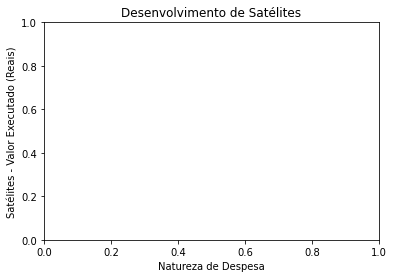

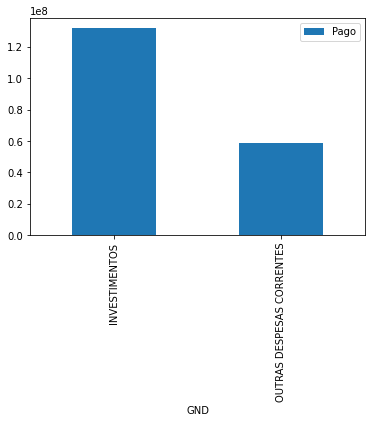

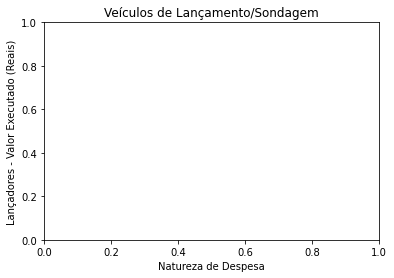

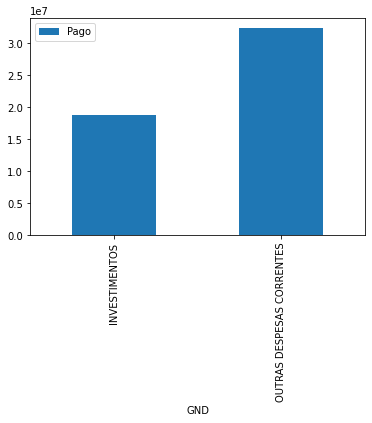

In [164]:
fig , ax = plt.subplots()
dados_20VC.groupby("GND")[["Pago"]].sum().plot.bar()
ax.set_ylabel("Satélites - Valor Executado (Reais)")
ax.set_xlabel("Natureza de Despesa")
ax.set_title("Desenvolvimento de Satélites")
plt.show()

fig , ax = plt.subplots()
dados_20V0.groupby("GND")[["Pago"]].sum().plot.bar()
ax.set_ylabel("Lançadores - Valor Executado (Reais)")
ax.set_xlabel("Natureza de Despesa")
ax.set_title("Veículos de Lançamento/Sondagem")
plt.show()

Testamos agrupando por Natureza da Despesa, inicialmente. Os resultados mostram uma diferença na execução dos projetos. Em satélites, grande parte dos gastos executados são em investimentos: maquinário, hardware, peças e equipamentos. Já no caso de veículos lançadores, apesar de ser esperado comportamento semelhante, o comportamento observado é uma predominância de gastos em custeio: serviços, manutenção, suporte a operações. O que se depreende é que, apesar de haver previsão orçamentária para aquisição dos equipamentos e componentes necessários, dentre os 30% que são efetivamente pagos, os gastos em custeio dos laboratórios e infraestrutura para permitir a construção de lançadores é o que tem vazão.

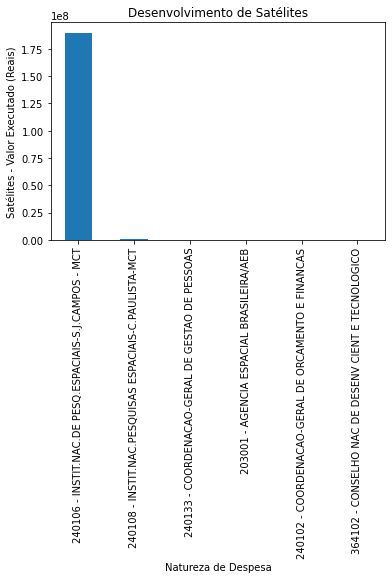

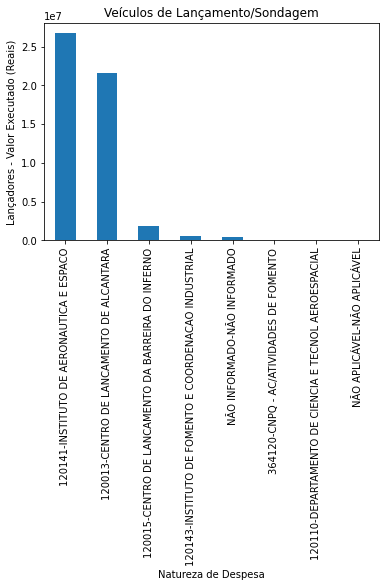

In [168]:
fig , ax = plt.subplots()
dados_20VC.groupby("UG (Cod/Desc)")["Pago"].sum().sort_values(ascending=False).head(10).plot.bar()
ax.set_ylabel("Satélites - Valor Executado (Reais)")
ax.set_xlabel("Natureza de Despesa")
ax.set_title("Desenvolvimento de Satélites")
plt.show()

fig , ax = plt.subplots()
dados_20V0.groupby("UG Responsável (Cod/Desc)")["Pago"].sum().sort_values(ascending=False).head(10).plot.bar()
ax.set_ylabel("Lançadores - Valor Executado (Reais)")
ax.set_xlabel("Natureza de Despesa")
ax.set_title("Veículos de Lançamento/Sondagem")
plt.show()

Já por Unidade Gestora responsável pela execução do projeto, não houve explicação clara do que está ocorrendo. Um indício, porém, deve-se ao fato de aparecer o Centro de Lançamento de Alcântara (CLA) no ranking de maior executor do orçamento. Lá, tipicamente, esses valores são utilizados para manutenção das infraestruturas necessárias para o lançamento de foguetes. Talvez, com mais dados disponíveis acerca do projeto (e não somente orçamentários e financeiros), seja possível explicar esse comportamento.